In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('sinais_vitais_com_label_treino.txt', sep=',', header=0)
X = df.iloc[:, 2:6]
y = df.iloc[:, 6]

model1 = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500)
model2 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate_init=0.01, max_iter=500)
model3 = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=500)
model4 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 500, learning_rate_init = 0.007)  
model5 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 1000, learning_rate_init = 0.002)  
model6 = MLPRegressor(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'adam', max_iter = 1000, learning_rate_init = 0.002)  

best_model = None
best_rmse = None

models = [model1, model2, model3, model4, model5, model6]
for i, model in enumerate(models, start=1):
    model.fit(X, y)
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    print(f'Model {i} RMSE: {rmse}')
    if best_model is None or rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f'Best model RMSE: {best_rmse}')

blind_test_data = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
X_blind_test = blind_test_data.iloc[:, 2:6]

blind_test_predictions = best_model.predict(X_blind_test)

pd.DataFrame(blind_test_predictions).to_csv('predictions.csv', index=False, header=False)

Model 1 RMSE: 10.119121343170201
Model 2 RMSE: 15.592283939951747
Model 3 RMSE: 8.138035793298377
Model 4 RMSE: 6.472204138162716
Model 5 RMSE: 6.330211733528322
Model 6 RMSE: 12.10917024281959
Best model RMSE: 6.330211733528322


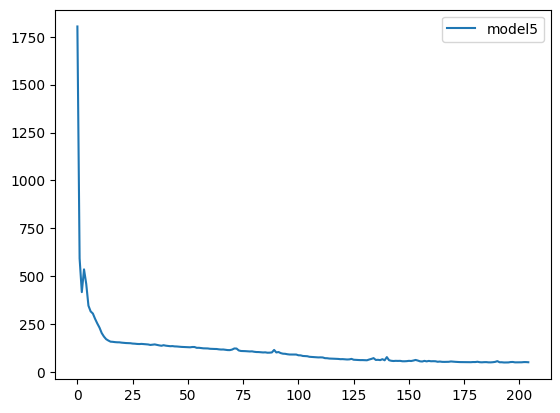

In [64]:
import matplotlib.pyplot as plt

plt.plot(model1.loss_curve_, label='model5')
plt.legend()
plt.show()

In [66]:
model5 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 1000, learning_rate_init = 0.002)  

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model5, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(np.sqrt(-scores))
print(np.mean(np.sqrt(-scores)))

[-65.62767962 -47.26763293 -44.97568062 -47.12833866 -59.12108657]
[8.10109126 6.87514603 6.70639103 6.86500828 7.68902377]
7.2473320737469065


In [69]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3, model4, model5]
best_model = None
best_rmse = float('inf')

for i, model in enumerate(models, start=1):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'Model {i} average RMSE: {avg_rmse}')
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model

print(f'Best model average RMSE: {best_rmse}')

Model 1 average RMSE: 11.7256474451187
Model 2 average RMSE: 15.796054161409803
Model 3 average RMSE: 13.268734120515884
Model 4 average RMSE: 9.195370780766599
Model 5 average RMSE: 8.013061723634413
Best model average RMSE: 8.013061723634413
